In [1]:
import pandas as pd

In [2]:
muts_df = pd.read_pickle("./data/4_10_with_uniq_midpts.pkl")
display(len(muts_df), muts_df.head())

3921

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,...,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
4,13,42C,1,124,1,1,1.0,4400313,SNP,A→C,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [8]:
# filtering out large mutations that can include 100s of features

import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_mut_size


muts_df["mutation size"] = muts_df.apply(get_mut_size, axis=1)  # get_mut_size currently doesn't return MOB mut sizes. Isn't something currently necessary.
muts_df = muts_df[muts_df["mutation size"] <= 100]

display(len(muts_df), muts_df.head())

3834

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,...,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation size
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),21
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),82
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1
4,13,42C,1,124,1,1,1.0,4400313,SNP,A→C,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1


In [9]:
muts_df["sample"] = muts_df.apply(lambda r:
                                  r.exp
                                  + ' ' + str(int(r["ale"]))
                                  + ' ' + str(int(r["flask"]))
                                  + ' ' + str(int(r["isolate"]))
#                                   + ' ' + str(r["tech_rep"])  # commented these out since the mutations that are represented are those with highest freq across sample replications from the same flask, therefore there shouldn't be any mutation overlap between the sample replicates from the same flask.
                                          , axis=1
                                 )
muts_df.head()

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,...,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation size
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),21
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),82
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1
4,13,42C,1,124,1,1,1.0,4400313,SNP,A→C,...,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1


In [10]:
FEAT_TYPES = ["genomic features",
#               "operons", "pathways", "regulators"
             ]  # ignoring genetic features for now since the genes get double with genomic features

sample_feat_df = pd.DataFrame()
for _, m in muts_df.iterrows():
    mut_assoc = False
    for ft in FEAT_TYPES:
        for f in m[ft]:
            feat_name = f["RegulonDB ID"]  # using the names is problemmatic since some of the names are mangled by AVA (specifically TFBS)
#             if ft == "operons":  # have to at least do operon since some operons have the same name as genes and will double-count
#                 feat_name += " operon"
#             if ft == "pathways":
#                 feat_name += " pathway"
#             if ft == "regulators":
#                 feat_name += " regulon"
            sample_feat_df = sample_feat_df.append({"sample": m["sample"], "mutated feature": feat_name}, ignore_index=True)

sample_feat_df.head()

,mutated feature,sample
0,ECK120000625,42C 1 124 1
1,ECK120001556,42C 1 124 1
2,ECK125144791,42C 1 124 1
3,ECK120000854,42C 1 124 1
4,ECK120000886,42C 1 124 1


In [11]:
cross_counts_df = pd.crosstab(
        sample_feat_df["mutated feature"], sample_feat_df["sample"]
    )
cross_counts_df = cross_counts_df.T  # correlation matrix needs the targets to be the columns
display(cross_counts_df.head(), len(cross_counts_df))

mutated feature,ECK120000008,ECK120000017,ECK120000018,ECK120000021,ECK120000024,ECK120000031,ECK120000032/ECK120002008,ECK120000036,ECK120000037,ECK120000048,...,ECK125145707,ECK125165415,ECK125240970,ECK125240973,ECK125240976,ECK125240991,ECK125257016,ECK125258431,ECK125258437,ECK125272704
sample,,,,,,,,,,,,,,,,,,,,,
42C 1 124 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42C 10 153 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42C 4 161 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42C 5 125 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42C 7 135 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


724

In [12]:
corr_df = cross_counts_df.corr()
corr_df.head()

mutated feature,ECK120000008,ECK120000017,ECK120000018,ECK120000021,ECK120000024,ECK120000031,ECK120000032/ECK120002008,ECK120000036,ECK120000037,ECK120000048,...,ECK125145707,ECK125165415,ECK125240970,ECK125240973,ECK125240976,ECK125240991,ECK125257016,ECK125258431,ECK125258437,ECK125272704
mutated feature,,,,,,,,,,,,,,,,,,,,,
ECK120000008,1.000000,-0.011587,-0.008188,-0.008188,-0.014201,-0.008188,-0.008188,-0.008188,-0.044158,-0.013663,...,-0.008188,-0.008188,-0.011587,-0.008188,-0.044158,-0.008188,-0.008188,-0.008188,-0.011587,-0.008188
ECK120000017,-0.011587,1.000000,-0.001957,-0.001957,-0.003395,-0.001957,-0.001957,-0.001957,-0.010557,-0.003266,...,-0.001957,-0.001957,-0.002770,-0.001957,-0.010557,-0.001957,-0.001957,-0.001957,-0.002770,-0.001957
ECK120000018,-0.008188,-0.001957,1.000000,-0.001383,-0.002399,-0.001383,-0.001383,-0.001383,-0.007459,-0.002308,...,-0.001383,-0.001383,-0.001957,-0.001383,-0.007459,-0.001383,-0.001383,-0.001383,-0.001957,-0.001383
ECK120000021,-0.008188,-0.001957,-0.001383,1.000000,-0.002399,-0.001383,-0.001383,-0.001383,-0.007459,-0.002308,...,-0.001383,-0.001383,-0.001957,-0.001383,-0.007459,-0.001383,-0.001383,-0.001383,-0.001957,-0.001383
ECK120000024,-0.014201,-0.003395,-0.002399,-0.002399,1.000000,-0.002399,-0.002399,-0.002399,-0.012938,-0.004003,...,-0.002399,-0.002399,-0.003395,-0.002399,-0.012938,-0.002399,-0.002399,-0.002399,-0.003395,-0.002399


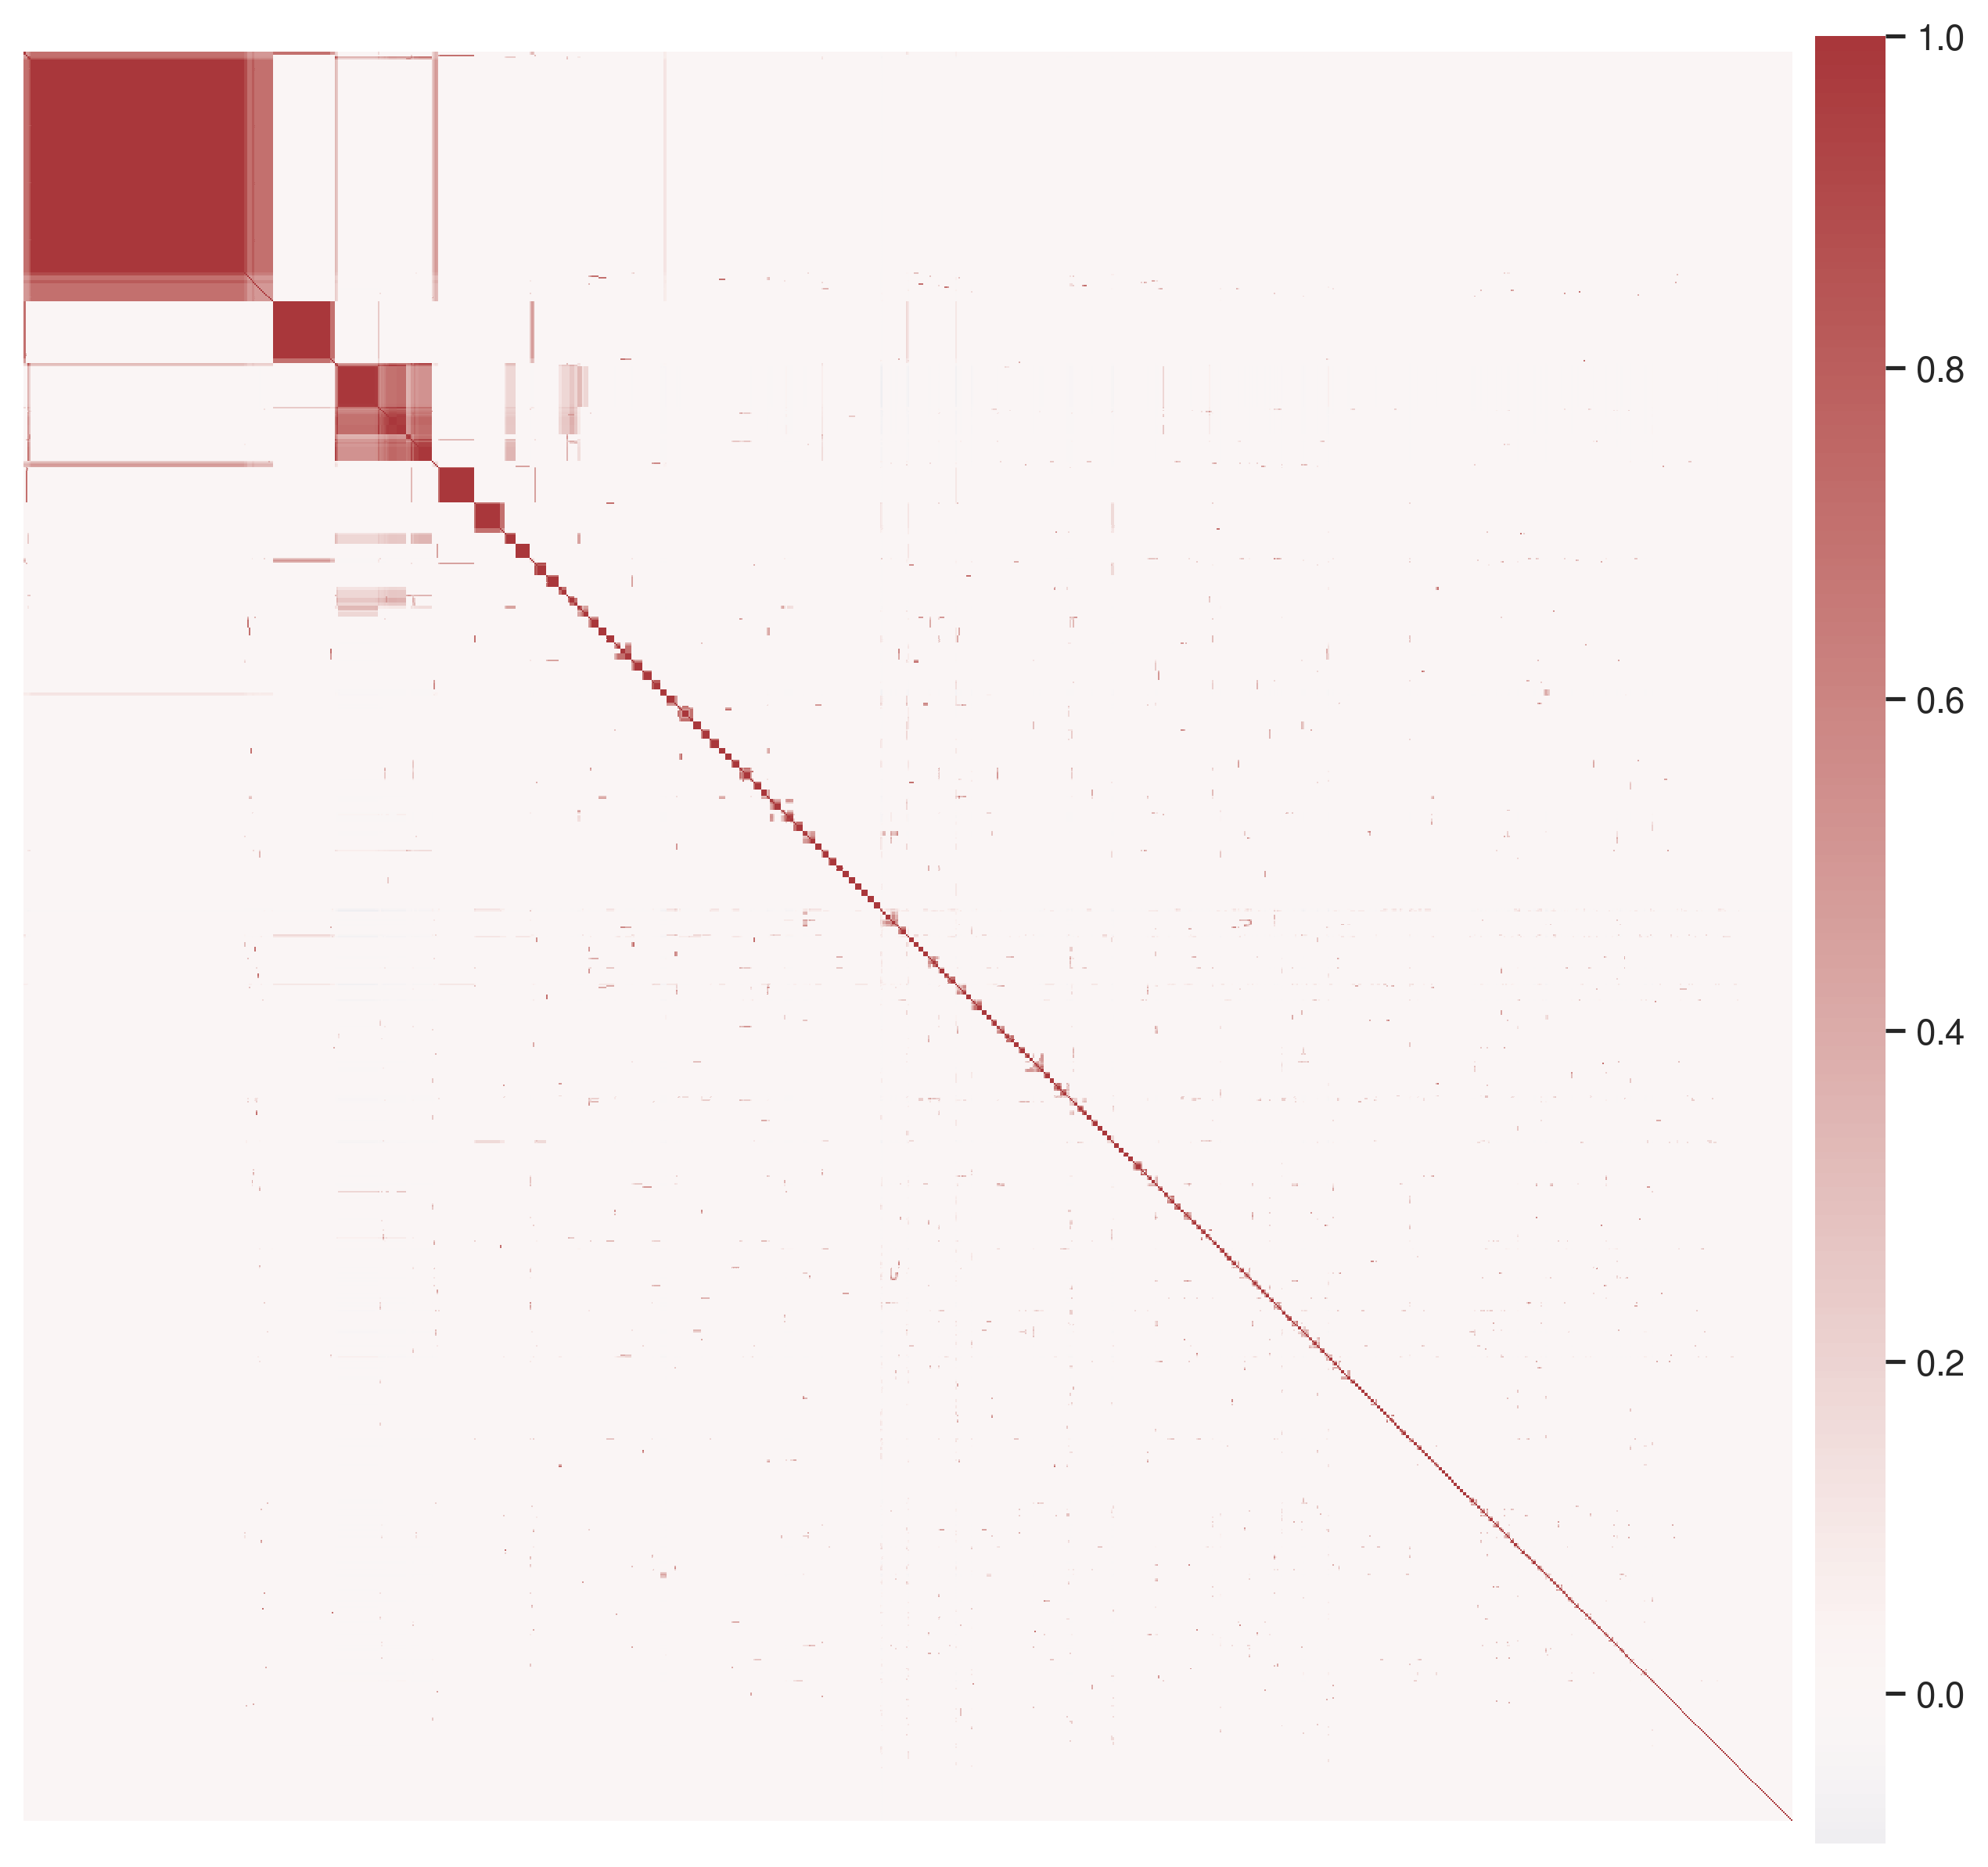

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("white")
sns.set(font="FreeSans")


cm = sns.clustermap(
    corr_df,
    #     figsize=(15,15),
    linewidths=0,
    xticklabels=False,
    yticklabels=False,
    center=0,
    cmap="vlag",
#     cbar_pos=(0.1, 0.85, 0.03, 0.10),
    cbar_pos=(0.97, 0.03, .03, 0.77),
    cbar_kws={'label': ''}
#     cbar_kws={'label': 'Pearson correlation'}
)
# Fix for recent matplotlib/seaborn issue
cm.ax_heatmap.set_ylim(len(corr_df.T)+0, -0)

cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)

# cm.ax_heatmap.set_title("Correlations between mutated genomic features")
cm.ax_heatmap.set_title("")
ax = cm.ax_heatmap
ax.set_ylabel("")
ax.set_xlabel("")
plt.savefig("corrs.svg")

In [14]:
import scipy.cluster.hierarchy as sch

In [15]:
# retrieve clusters using fcluster 
d = sch.distance.pdist(corr_df)
L = sch.linkage(d, method='complete')

# 0.3 can be modified to retrieve more stringent or relaxed clusters.
# the 0.3 was set in a semi-arbitrary way. Should probably put more thought into it.
clusters = sch.fcluster(L, 0.2*d.max(), 'distance')

In [16]:
from collections import Counter

clstr_geno_feat_cnt_d = dict(Counter(clusters))
clstr_geno_feat_cnt_d.values()

dict_values([474, 10, 5, 140, 23, 44, 4, 17, 28, 4, 4, 40, 14, 9, 20, 8, 10, 19, 7, 9, 5, 7, 4, 4, 7, 6, 6, 6, 8, 4, 8, 5, 7, 3, 1, 7, 2, 6, 6, 11, 4, 7, 5, 9, 5, 4, 10, 4, 2, 6, 2, 7, 5, 6, 6, 6, 4, 6, 5, 8, 6, 2, 1, 5, 5, 4, 4, 6])

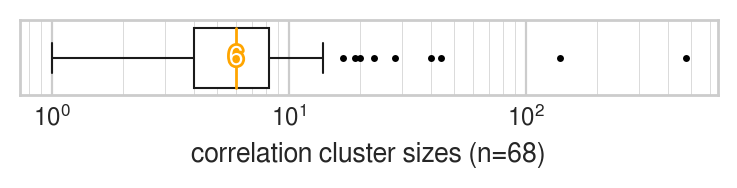

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.set_palette("muted")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
#         text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',  # for decimal medians
        text = ax.text(x, y, str(int(value)),
                       ha='center', va='center',
#                        fontweight='bold',
                       color='white'
                      )
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground=median.get_color()),
            path_effects.Normal(),
        ])

boxplot_kwargs = {
    'boxprops': { 'color':'w', 'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': "black", 'markeredgecolor': "None"}
}

df = pd.DataFrame(clstr_geno_feat_cnt_d.values(), columns=["correlation cluster sizes"])
plt.figure(figsize=(4.5, 0.5))
ax = sns.boxplot(
    data=df,
    x="correlation cluster sizes",
    **boxplot_kwargs
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.set_xscale('log')
add_median_labels(ax)
ax.tick_params(axis='both', which='both', length=0)

ax.set_xlabel("correlation cluster sizes (n=" + str(len(clstr_geno_feat_cnt_d.values())) + ')')
plt.savefig("corr_clust_sizes_boxplt.svg")

/home/pphaneuf/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'cluster count')

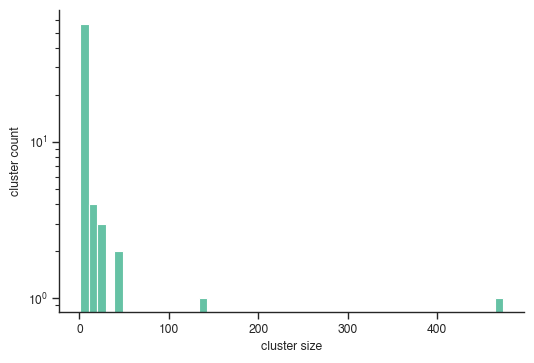

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_palette("Set2")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1

# plt.hist(
#     clstr_geno_feat_cnt_d.values(),
#     bins=50
# )
ax = sns.distplot(
    list(clstr_geno_feat_cnt_d.values()),
    kde=False,
    hist_kws={"alpha": 1}
)
plt.yscale('log')

sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
plt.xlabel('cluster size', fontname="FreeSans", fontsize=9)
plt.ylabel('cluster count', fontname="FreeSans", fontsize=9)
# plt.set_title("Size of correlation clusters", fontname="FreeSans",)

/home/pphaneuf/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/pphaneuf/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


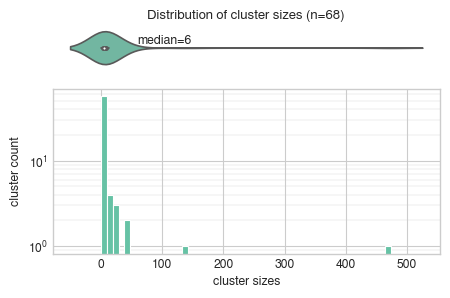

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_palette("Set2")
sns.set_context("paper")
# sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1


f, (ax_box, ax_hist) = plt.subplots(
    2,
    sharex=True,
    figsize=(5,3),
    gridspec_kw={"height_ratios": (.20, .80)}
)

x = list(clstr_geno_feat_cnt_d.values())
sns.violinplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist, kde=False, hist_kws={"alpha": 1})

import numpy as np
ax_box.text(60, -0.1, "median=" + str(int(np.median(x))), fontsize=9)

plt.yscale('log')

ax_box.set(yticks=[])
# sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True,right=True,top=True,bottom=True)
ax_box.yaxis.grid(False)
ax_box.xaxis.grid(False)

ax_hist.tick_params(axis='both', which='both', length=0)
ax_hist.yaxis.grid(True, "minor", linewidth=.25)

plt.xlabel('cluster sizes', fontname="FreeSans", fontsize=9)
plt.ylabel('cluster count', fontname="FreeSans", fontsize=9)
ax_box.set_title("Distribution of cluster sizes (n=" + str(len(clstr_geno_feat_cnt_d.values())) + ')', fontname="FreeSans",)

In [34]:
corr_df.min().min()

-0.09065199859877346

In [35]:
from itertools import combinations 

pairs = list(combinations(set(corr_df.columns), 2))
display(len(pairs[:10]), pairs[:10])

10

[('ECK120010328', 'ECK120003478'),
 ('ECK120010328', 'ECK120001502'),
 ('ECK120010328', 'ECK125143900'),
 ('ECK120010328', 'ECK120000065'),
 ('ECK120010328', 'ECK120001646'),
 ('ECK120010328', 'ECK120002281/ECK120000421'),
 ('ECK120010328', 'ECK120000160'),
 ('ECK120010328', 'ECK120000601'),
 ('ECK120010328', 'ECK120000690'),
 ('ECK120010328', 'ECK120000694/ECK120001851')]

In [36]:
pair_corrs = list()

for p in pairs:
    pair_corrs.append(corr_df.at[p[0], p[1]])

/home/pphaneuf/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/pphaneuf/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of feature-pair correlations (n=656085)')

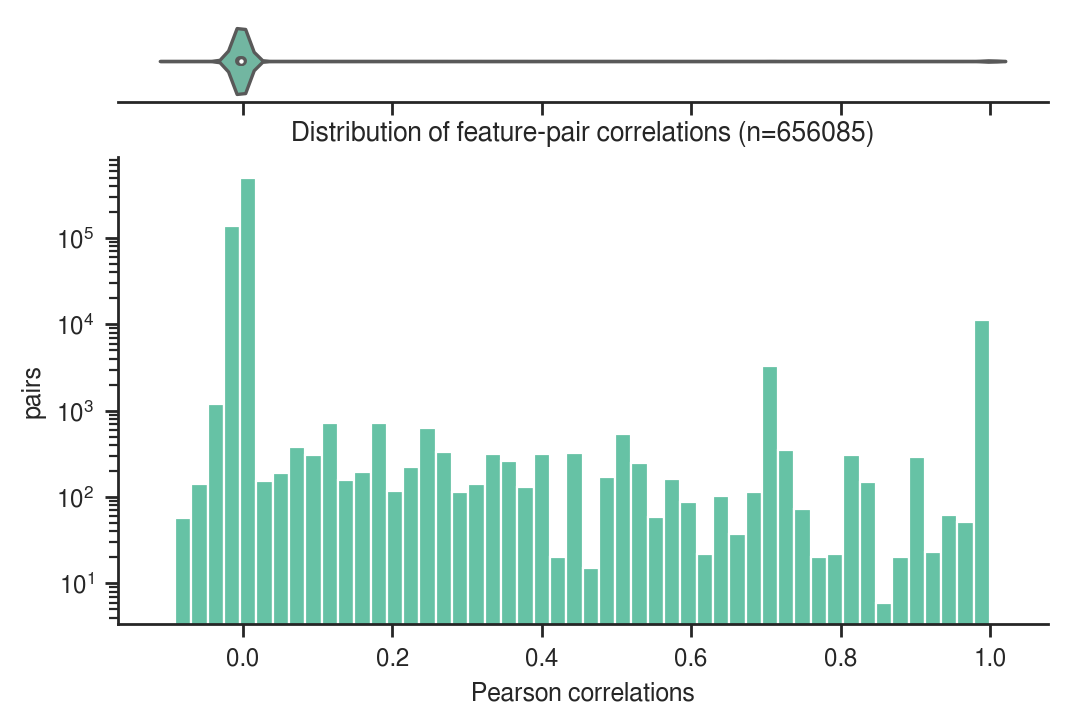

In [37]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("Set2")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

x = list(pair_corrs)
sns.violinplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist, kde=False, hist_kws={"alpha": 1})

plt.yscale('log')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.xlabel('Pearson correlations', fontname="FreeSans", fontsize=9)
plt.ylabel('pairs', fontname="FreeSans", fontsize=9)
plt.title("Distribution of feature-pair correlations (n=" + str(len(pair_corrs)) + ')', fontname="FreeSans",)

Text(0.5, 1.0, 'Distribution of feature-pair correlations (n=656085)')

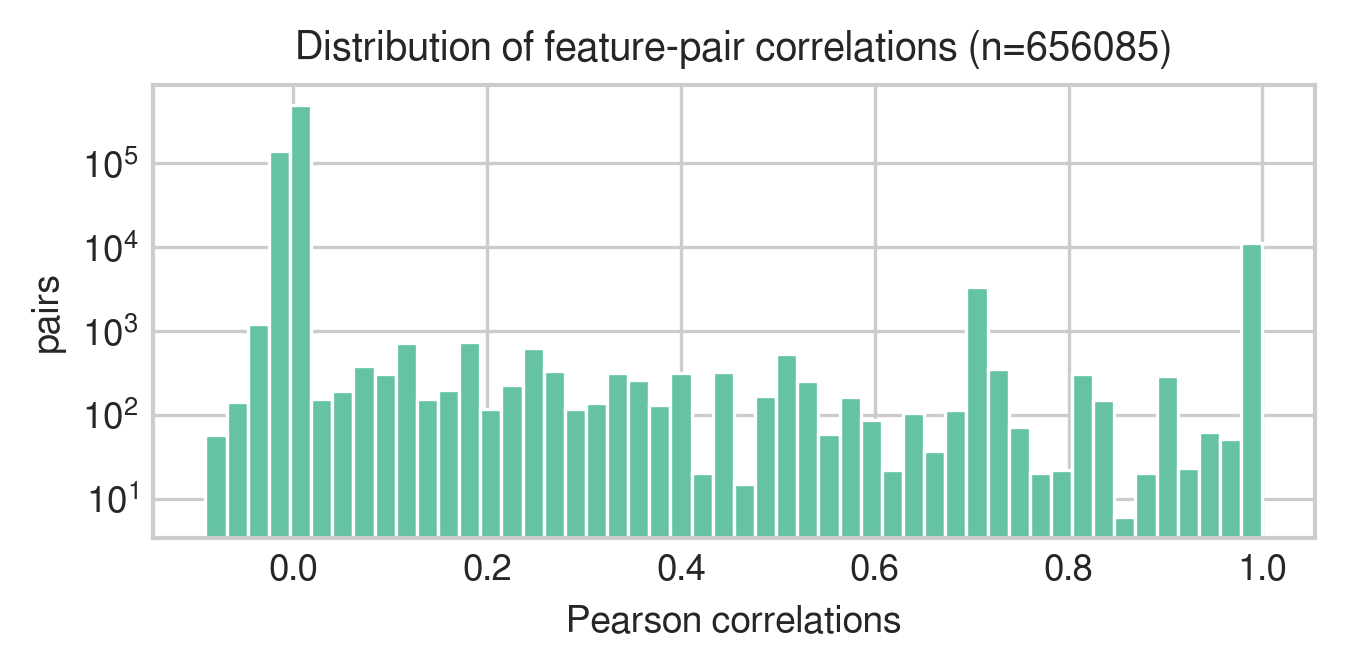

In [38]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("Set2")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1

fig, ax = plt.subplots(figsize=(5,2))
sns.distplot(
    list(pair_corrs),
    ax=ax,
    kde=False,
    hist_kws={"alpha": 1}
)
plt.yscale('log')

# sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel('Pearson correlations', fontname="FreeSans", fontsize=9)
plt.ylabel('pairs', fontname="FreeSans", fontsize=9)
plt.title("Distribution of feature-pair correlations (n=" + str(len(pair_corrs)) + ')', fontname="FreeSans",)